In [185]:
import pandas as pd
import numpy as np
import datetime as dt
import os

In [1]:
path='../dataset/AIT/data/mail.cup.com/apache2/mail.cup.com-access.log'

log_data=open(path,'r')

In [198]:
from datetime import datetime
import pytz

def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[my string]')`
        `'my string'`
    """
    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    if x[1:-7] == '':
        pass
    else:
        try:
            dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
            dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
        except ValueError:
            print("Not able to split .")
        try:
            return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
        except UnboundLocalError:
            print("UnboundLocalError")

In [180]:
import re
import pandas as pd

data = pd.read_csv(
    path,
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip','time', 'request', 'status', 'size', 'referer', 'user_agent'])
data.head()

,ip,time,request,status,size,referer,user_agent
0,192.168.10.190,[29/Feb/2020:00:00:02 +0000],"""GET /login.php HTTP/1.1""",200,2532,"""-""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73..."
1,192.168.10.4,[29/Feb/2020:00:00:09 +0000],"""POST /services/ajax.php/kronolith/listTopTags...",200,402,"""http://mail.cup.com/kronolith/""","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5..."
2,192.168.10.190,[29/Feb/2020:00:00:12 +0000],"""POST /login.php HTTP/1.1""",302,601,"""http://mail.cup.com/login.php""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73..."
3,192.168.10.190,[29/Feb/2020:00:00:13 +0000],"""GET /services/portal/ HTTP/1.1""",200,7696,"""http://mail.cup.com/login.php""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73..."
4,192.168.10.190,[29/Feb/2020:00:00:14 +0000],"""GET /themes/default/graphics/head-bg.png HTTP...",200,380,"""http://mail.cup.com/themes/default/screen.css""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73..."


In [ ]:
data['time'] = data['time'].apply(lambda x: parse_datetime(x))
data['time']

In [181]:
data['method'] = data.request.str.split(' ').str[0]
data['path'] = data.request.str.split(' ').str[1]
data['protocol'] = data.request.str.split(' ').str[2]
data.head()

,ip,time,request,status,size,referer,user_agent,method,path,protocol
0,192.168.10.190,[29/Feb/2020:00:00:02 +0000],"""GET /login.php HTTP/1.1""",200,2532,"""-""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73...","""GET",/login.php,"HTTP/1.1"""
1,192.168.10.4,[29/Feb/2020:00:00:09 +0000],"""POST /services/ajax.php/kronolith/listTopTags...",200,402,"""http://mail.cup.com/kronolith/""","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...","""POST",/services/ajax.php/kronolith/listTopTags,"HTTP/1.1"""
2,192.168.10.190,[29/Feb/2020:00:00:12 +0000],"""POST /login.php HTTP/1.1""",302,601,"""http://mail.cup.com/login.php""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73...","""POST",/login.php,"HTTP/1.1"""
3,192.168.10.190,[29/Feb/2020:00:00:13 +0000],"""GET /services/portal/ HTTP/1.1""",200,7696,"""http://mail.cup.com/login.php""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73...","""GET",/services/portal/,"HTTP/1.1"""
4,192.168.10.190,[29/Feb/2020:00:00:14 +0000],"""GET /themes/default/graphics/head-bg.png HTTP...",200,380,"""http://mail.cup.com/themes/default/screen.css""","""Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73...","""GET",/themes/default/graphics/head-bg.png,"HTTP/1.1"""


In [186]:
df = pd.DataFrame(columns = ['timestamp', 'method', 'status', 'referer', 'path', 'payload', 'bytes'])
df.head()

,timestamp,method,status,referer,path,payload,bytes


In [187]:
df['timestamp'] = data['time']
df['method'] = data['method']
df['status'] = data['status']
df['referer'] = data['referer']
df['path'] = data['path']
df['bytes'] = data['size']
df.head()

,timestamp,method,status,referer,path,payload,bytes
0,[29/Feb/2020:00:00:02 +0000],"""GET",200,"""-""",/login.php,NaN,2532
1,[29/Feb/2020:00:00:09 +0000],"""POST",200,"""http://mail.cup.com/kronolith/""",/services/ajax.php/kronolith/listTopTags,NaN,402
2,[29/Feb/2020:00:00:12 +0000],"""POST",302,"""http://mail.cup.com/login.php""",/login.php,NaN,601
3,[29/Feb/2020:00:00:13 +0000],"""GET",200,"""http://mail.cup.com/login.php""",/services/portal/,NaN,7696
4,[29/Feb/2020:00:00:14 +0000],"""GET",200,"""http://mail.cup.com/themes/default/screen.css""",/themes/default/graphics/head-bg.png,NaN,380


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148534 entries, 0 to 148533
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  148534 non-null  object
 1   method     148534 non-null  object
 2   status     148534 non-null  object
 3   referer    148464 non-null  object
 4   path       148461 non-null  object
 5   payload    0 non-null       object
 6   bytes      148465 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


In [191]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

ParserError: Unknown string format: [29/Feb/2020:00:00:02 +0000]

In [190]:
df['timestamp'] = df.timestamp.dt.strftime('%Y-%m-%d %H:%M:%S')
df.head()

ParserError: Unknown string format: [29/Feb/2020:00:00:02 +0000]

In [80]:
df['payload'] = df['payload'].fillna('"-"')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148534 entries, 0 to 148533
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  148463 non-null  object
 1   method     148534 non-null  object
 2   status     148534 non-null  object
 3   referer    148464 non-null  object
 4   path       148461 non-null  object
 5   payload    148534 non-null  object
 6   bytes      148465 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


In [141]:
label_file_path = '../dataset/AIT/labels/mail.cup.com/apache2/mail.cup.com-access.log'
label_df = pd.read_csv(label_file_path, header = None, names = ['attack1', 'attack2'])
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148534 entries, 0 to 148533
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   attack1  148534 non-null  object
 1   attack2  148534 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [142]:
df_concat = pd.concat([df, label_df], axis = 1)
df_concat.head()

,timestamp,method,status,referer,path,payload,bytes,attack1,attack2
0,2020-02-29 00:00:02,GET,200,"""-""",/login.php,"""-""",2532,0,0
1,2020-02-29 00:00:09,POST,200,"""http://mail.cup.com/kronolith/""",/services/ajax.php/kronolith/listTopTags,"""-""",402,0,0
2,2020-02-29 00:00:12,POST,302,"""http://mail.cup.com/login.php""",/login.php,"""-""",601,0,0
3,2020-02-29 00:00:13,GET,200,"""http://mail.cup.com/login.php""",/services/portal/,"""-""",7696,0,0
4,2020-02-29 00:00:14,GET,200,"""http://mail.cup.com/themes/default/screen.css""",/themes/default/graphics/head-bg.png,"""-""",380,0,0


In [143]:
df_concat['method'] = df_concat['method'].apply(lambda x: x[1:])

In [144]:
df_concat['method']

0          ET
1         OST
2         OST
3          ET
4          ET
         ... 
148529     ET
148530    OST
148531     ET
148532     ET
148533     ET
Name: method, Length: 148534, dtype: object

In [145]:
df_concat['attack1'] = df_concat['attack1'].apply(lambda x: ((x.isnumeric()*1) == 0 ) * 1)

In [147]:
df_concat['attack1'].value_counts()


0    141745
1      6789
Name: attack1, dtype: int64

In [148]:
df_concat['attack2'].value_counts()

0              141903
nikto            6295
hydra             329
upload              5
mail-curl           1
webshell-id         1
Name: attack2, dtype: int64

In [149]:
df_concat['attack2'] = df_concat['attack2'].apply(lambda x: ((x.isnumeric()*1) == 0) * 1)

In [150]:
df_concat['attack2'].value_counts()

0    141903
1      6631
Name: attack2, dtype: int64

In [166]:
df_concat['attack'] = df_concat['attack1'] + df_concat['attack2']
df_concat['attack'].value_counts()

0    141745
2      6631
1       158
Name: attack, dtype: int64

In [170]:
df_concat['attack'] = df_concat['attack'].apply(lambda x: (((x == 2 & 1) * 1) == 1 ) * 1) 
df_concat['attack'].value_counts()

0    141745
1      6789
Name: attack, dtype: int64

In [175]:
df_concat.drop(['attack1', 'attack2'], axis='columns', inplace=True)
df_concat.head()

,timestamp,method,status,referer,path,payload,bytes,attack
0,2020-02-29 00:00:02,ET,200,"""-""",/login.php,"""-""",2532,0
1,2020-02-29 00:00:09,OST,200,"""http://mail.cup.com/kronolith/""",/services/ajax.php/kronolith/listTopTags,"""-""",402,0
2,2020-02-29 00:00:12,OST,302,"""http://mail.cup.com/login.php""",/login.php,"""-""",601,0
3,2020-02-29 00:00:13,ET,200,"""http://mail.cup.com/login.php""",/services/portal/,"""-""",7696,0
4,2020-02-29 00:00:14,ET,200,"""http://mail.cup.com/themes/default/screen.css""",/themes/default/graphics/head-bg.png,"""-""",380,0


In [17]:
labels

,label1,label2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
148529,0,0
148530,0,0
148531,0,0
148532,0,0


In [18]:
labeled_data = pd.concat([data, labels], axis=1)

In [ ]:
labeled_data[labeled_data.label1 != '0'].to_csv('l.csv')

In [ ]:
notnormal_data = pd.read_csv('l.csv')

In [19]:
# notnormal_data.iloc[0].to_string(header=False, index=False)
l = data.iloc[0,:].apply(str).values
s = " ".join(l)
print(s)


192.168.10.190 2020-02-29 00:00:02+00:00 GET /login.php HTTP/1.1 200 2532 "-" "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0"


In [20]:
a_string = s

a_byte_array = bytearray(a_string, "utf8")
print(a_byte_array)
byte_list = []
int_list = []
for byte in a_byte_array:
    binary_representation = bin(byte)[2:].zfill(8)
    int_list.append(byte)
    byte_list.append(binary_representation)


print(byte_list)
test = " ".join(byte_list)

bytearray(b'192.168.10.190 2020-02-29 00:00:02+00:00 GET /login.php HTTP/1.1 200 2532 "-" "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0"')
['00110001', '00111001', '00110010', '00101110', '00110001', '00110110', '00111000', '00101110', '00110001', '00110000', '00101110', '00110001', '00111001', '00110000', '00100000', '00110010', '00110000', '00110010', '00110000', '00101101', '00110000', '00110010', '00101101', '00110010', '00111001', '00100000', '00110000', '00110000', '00111010', '00110000', '00110000', '00111010', '00110000', '00110010', '00101011', '00110000', '00110000', '00111010', '00110000', '00110000', '00100000', '01000111', '01000101', '01010100', '00100000', '00101111', '01101100', '01101111', '01100111', '01101001', '01101110', '00101110', '01110000', '01101000', '01110000', '00100000', '01001000', '01010100', '01010100', '01010000', '00101111', '00110001', '00101110', '00110001', '00100000', '00110010', '00110000', '00110000', '00100000', 

In [21]:
zipped = zip(byte_list[0::2], byte_list[1::2])
zipped2 = zip(int_list[0::2], int_list[1::2])

In [22]:
zipped2

In [23]:
img = np.zeros((255,255))
for i in zipped2:
  img[i] += 1
  print(img[i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
3.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
3.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [24]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

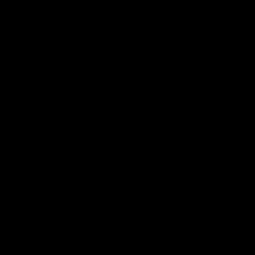

In [25]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(img)